![](feature.jpg)

# 1. Introduction 

In [Part 1](https://tonyjustdevs.github.io/blog/posts/2024-04-24-one_r_classifier/), a simple model was built using single binary split called `OneR Classifier`.   

In [Part 2](https://tonyjustdevs.github.io/blog/posts/2024-04-25-decision_tree_classifier/), sklearn `DecisionTreeClassifier` framework was used and by setting a sample limit per node, loss was reduced.   

In [Part 3](https://tonyjustdevs.github.io/blog/posts/2024-04-26-random_forest/), we used the concept of `bagging` by averaging predictions from many big trees to create a `random forest`.  

Today, we'll create a `Feature Importance Plot` very easily and quickly.

In the next post I'll go into:  

- `Gradient Boosting` (sum of trees ) Decision Tree or Machines (GBMs)

# 2. Training and Validation Sets

In [1]:
from fastai.imports import *
import torch, numpy as np, pandas as pd
import kaggle, zipfile
from pathlib import Path
path = Path("titanic")
if not path.exists():
    print(f"{path} folder doesn't exist, downloading...")
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f"{path}.zip").extractall(path)
else:
    print(f"{path} exists!")
!ls {path}

def proc_data_1(df):
    modes           = df.mode().iloc[0]
    df['Fare']      = df.Fare.fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFare']   = np.log1p(df['Fare'])
    df['Embarked']  = pd.Categorical(df.Embarked)
    df['Sex']       = pd.Categorical(df.Sex)

def convert_cats_to_codes_2(trn_df, val_df, cat_list):
    trn_df[cat_list] = trn_df[cat_list].apply(lambda dfcol: dfcol.cat.codes) # replace with 1 and 0s
    val_df[cat_list] = val_df[cat_list].apply(lambda dfcol: dfcol.cat.codes)
    return trn_df, val_df

from numpy import random
from sklearn.model_selection import train_test_split
random.seed(42)

# 0 get raw data
df              = pd.read_csv(path/'train.csv')
tst_df          = pd.read_csv(path/'test.csv')
# 1. clean data ([replace nas with mode], [logfare], [sex/embarked to cat])
proc_data_1(df)
proc_data_1(tst_df)

# 2. split training data: training and validation set
trn_df,val_df   = train_test_split(df, test_size=0.25)

# 3. convert cats to codes
cat_list        = ["Sex","Embarked"]
trn_df, val_df  = convert_cats_to_codes_2(trn_df, val_df, cat_list)

# 4. get idep and deps
dep_col         = "Survived"
cont_list       = ['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]
def get_trn_and_val_idep_dep(df):
    idep    = df[ cat_list + cont_list ].copy()
    dep     = df[dep_col]
    return idep, dep

trn_idep,trn_dep = get_trn_and_val_idep_dep(trn_df)
val_idep,val_dep = get_trn_and_val_idep_dep(val_df)

titanic exists!
gender_submission.csv  test.csv  train.csv


# 3. Build Decision Tree Classifier

In [2]:
from sklearn.tree import DecisionTreeClassifier
dtc_min50 = DecisionTreeClassifier(min_samples_leaf=50)


# 4. Fit Decision Tree to our Training Data 

In [3]:
dtc_min50.fit(trn_idep, trn_dep)

DecisionTreeClassifier(min_samples_leaf=50)

# 5. Create Feature Importance Plot

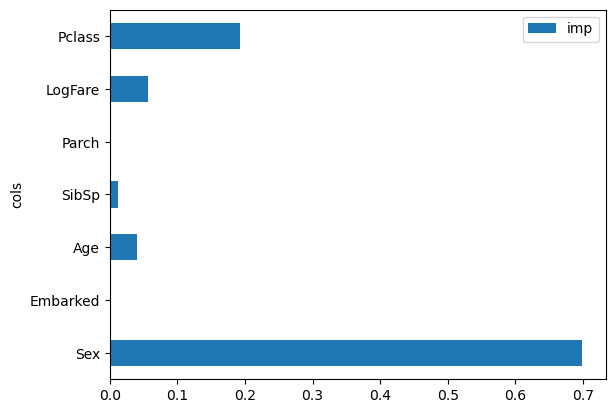

In [4]:
pd.DataFrame(dict(cols=trn_idep.columns, imp=dtc_min50.feature_importances_)).plot('cols', 'imp', 'barh')

# 6. Completed

As expected, `Sex` and `Pclass` are the most important features to survivability on the Titanic.